# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Author:** Quentin Talon, Albéric De Lajarte
**Due date:** 08.05.2020

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [2]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


In [3]:
#Dataset visualization
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from numpy import linalg as LA
import numpy as np

plt.figure(figsize=(20,10))
ax = plt.gca()

#Plot dataset
plt.scatter(a[:,0], a[:,1], marker= '+')
plt.scatter(b[:,0], b[:,1], marker= 'o')
plt.scatter(c[:,0], c[:,1], marker= ',')

#Compute mean of each dataset
mu_a = [np.mean(a[:,0]), np.mean(a[:,1])]
mu_b = [np.mean(b[:,0]), np.mean(b[:,1])]
mu_c = [np.mean(c[:,0]), np.mean(c[:,1])]

#Compute variance of each dataset
var_a = np.cov(a, rowvar=False)
var_b = np.cov(b, rowvar=False)
var_c = np.cov(c, rowvar=False)

#Plot dataset
plt.scatter(mu_a[0], mu_a[1], marker= '+', color = 'r')
plt.scatter(mu_b[0], mu_b[1], marker= 'o', color = 'r')
plt.scatter(mu_c[0], mu_c[1], marker= ',', color = 'r')

#Plot covariance ellipse
w,v = LA.eig(var_a)
ax.add_patch(Ellipse(xy=mu_a, width=4*np.sqrt(w[0]), height=4*np.sqrt(w[1]), edgecolor='r', fc='None', lw=2, angle=np.degrees(np.arctan2(w[1], w[0])) ))
w,v = LA.eig(var_b)
ax.add_patch(Ellipse(xy=mu_b, width=4*np.sqrt(w[0]), height=4*np.sqrt(w[1]), edgecolor='r', fc='None', lw=2, angle=np.degrees(np.arctan2(w[1], w[0])) ))
w,v = LA.eig(var_c)
ax.add_patch(Ellipse(xy=mu_c, width=4*np.sqrt(w[0]), height=4*np.sqrt(w[1]), edgecolor='r', fc='None', lw=2, angle=np.degrees(np.arctan2(w[0], w[1])) ))


plt.show()

<Figure size 2000x1000 with 1 Axes>

### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.

*Add your implementation and discussion*

##### Analytical expression
We compute $g_{ij}$ between all the classes. Then, for a given point $x$ we compute where it belongs. We proceed by elemination as in this example :
- A or B -> $x\notin B$
- A or C -> $x\notin C$
- B or C -> $x\notin C$

If a point doesnt not belong to B and C, we conclue it's in A.

In [4]:
# Analytical expression of Bayesian discriminant function with covariance matrix and no constant 
def discriminant_bayesian_complete(mu, var, XX, YY):
    def foo(X, mu, var):
        mu = np.asmatrix(mu).T
        var = np.asmatrix(var)
        g = -0.5*(X.T@var.I@X) + 0.5*X.T@var.I@mu - 0.5*mu.T@var.I@mu + 0.5*mu.T@var.I@X - np.log(2*np.pi*np.sqrt(LA.norm(var)))
        return g
    G = np.zeros((len(XX[0]), len(YY)))
    for i, x in enumerate(XX[0]):
        for j, y in enumerate(YY):
            X = np.matrix([[x], [y[0]]])
            G[j,i] = foo(X, mu, var)
    return G

In [5]:
# Analytical expression of Bayesian discriminant function with diagonal covariance matrix and no constant 
def discriminant_bayesian_diagonal(mu, var, XX, YY):
    C = np.transpose(mu)@LA.inv(var)@mu/(-2)
    G = (var[1,1]*XX**2 + var[0,0]*YY**2)/(-2*var[1,1]*var[0,0]) + (var[1,1]*XX*mu[0] + var[0,0]*YY*mu[1])/(var[1,1]*var[0,0]) + C
    return G

In [6]:
# Create 2D space
XX, YY = np.meshgrid(np.linspace(-20, 20, 50), np.linspace(-10, 10, 50))

G_a = {"name":"G_a",
       "value_diagonal":discriminant_bayesian_diagonal(mu_a, var_a, XX, YY),
       "value_complete":discriminant_bayesian_complete(mu_a, var_a, XX, YY),
       "var":(var_a),
       "mu":(mu_a),
       "datapoint":a,
       "marker":"+",
       "color":'r'}
G_b = {"name":"G_b",
       "value_diagonal":discriminant_bayesian_diagonal(mu_b, var_b, XX, YY),
       "value_complete":discriminant_bayesian_complete(mu_b, var_a, XX, YY),
       "var":(var_b),
       "mu":(mu_b),
       "datapoint":b,
       "marker":"o",
       "color":"g"}
G_c = {"name":"G_c",
       "value_diagonal":discriminant_bayesian_diagonal(mu_c, var_c, XX, YY),
       "value_complete":discriminant_bayesian_complete(mu_c, var_c, XX, YY),
       "var":(var_c),
       "mu":(mu_c),
       "datapoint":c,
       "marker":",",
       "color":"b"}
Gs = [G_a, G_b, G_c]

#Compute the zone that belogs to class
for v, b in zip(["value_diagonal", "value_complete"], ["bool_zone_diagonal", "bool_zone_complete"]):
    G_a_b = G_a[v]-G_b[v]>0
    G_a_c = G_a[v]-G_c[v]>0
    G_b_c = G_b[v]-G_c[v]>0
    G_a[b] = np.logical_and(G_a_b, G_a_c)
    G_b[b] = np.logical_and(np.logical_not(G_a_b), G_b_c)
    G_c[b] = np.logical_and(np.logical_not(G_a_c), np.logical_not(G_b_c))

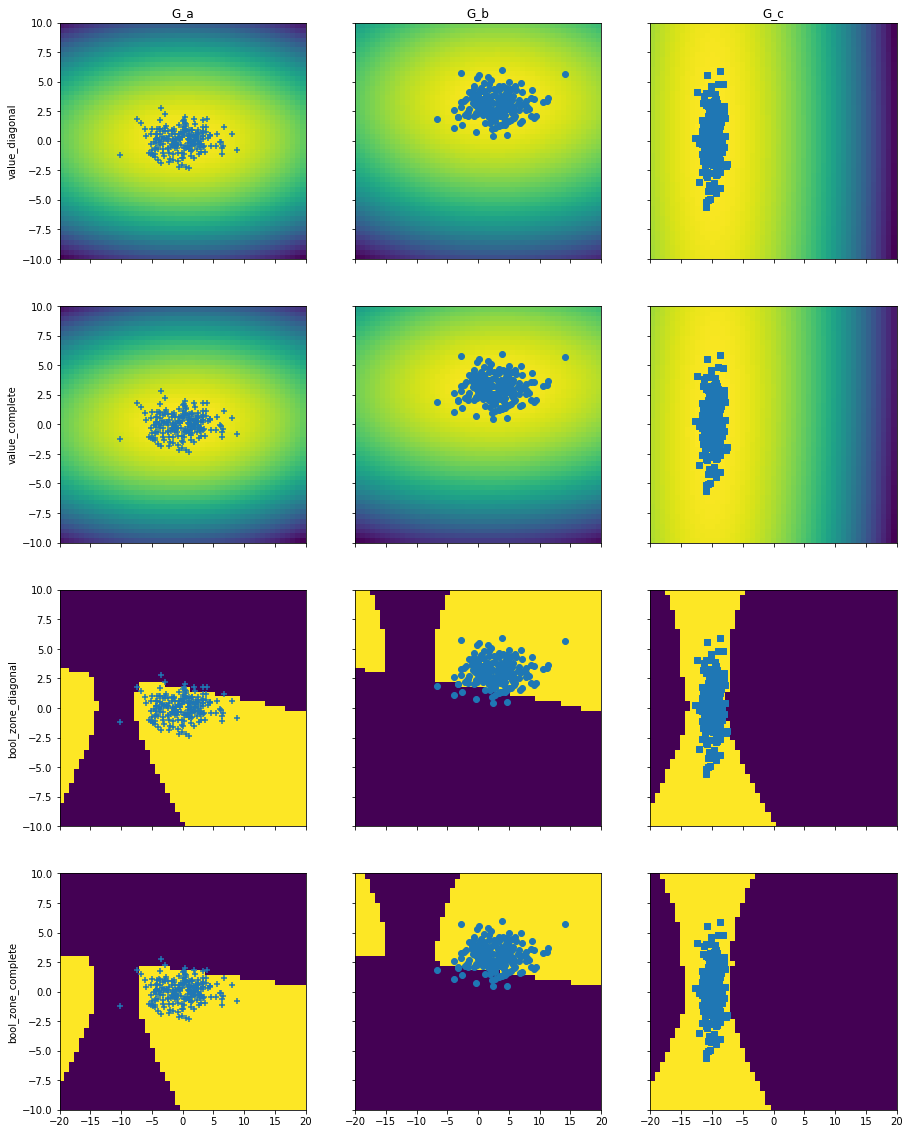

In [7]:
# Plot the function with the dataset
fig, axes = plt.subplots(4, len(Gs), figsize = (15, 20), sharey=True, sharex=True)
for i, v in enumerate(["value_diagonal", "value_complete", "bool_zone_diagonal", "bool_zone_complete"]):
    for j, (G, axe) in enumerate(zip(Gs, axes[i,:])):
        if j == 0: axe.set_ylabel(v)
        axe.pcolor(XX,YY, G[v])
        axe.scatter(G["datapoint"][:,0], G["datapoint"][:,1], marker = G["marker"])
        if i == 0: axe.set_title(G["name"])

plt.show()

**Analysis** : On the plots above, we compared a simplified version that contains only diagonal terms in the covariance matrix to the full covariant matrix.  
The zone in yellow correspond to the zoning to to corresponding class. We see few differences between the *full* and the *diagonal* version.

Albéric, je sais pas trop ce que tu voulais faire ici :/ Ca run mais je suis pas sur que ce soit correct ce que j'ai changé

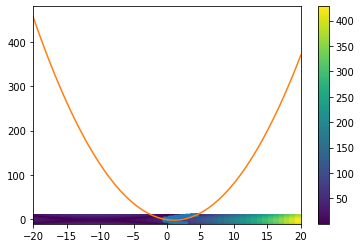

In [8]:
# Find contour of near zero term
from skimage.measure import find_contours
G_inter = abs(G_a["value_complete"]-G_c["value_complete"])
contour = find_contours(G_inter, 54, fully_connected = "low")[0]
contour = [XX[0,:][contour[:, 1].astype(int)], YY[:,0][contour[:, 0].astype(int)]]

# Fit parametric quadratic curve on the contour
contour_parameter = np.polyfit(contour[0], contour[1], 2)
contour_quad = np.poly1d(contour_parameter)

# Plot bayesian function and contour
plt.pcolor(XX, YY, G_inter)
plt.colorbar()

plt.plot(contour[0], contour[1], linewidth = 4)
plt.plot(XX[0,:], contour_quad(XX[0,:]))

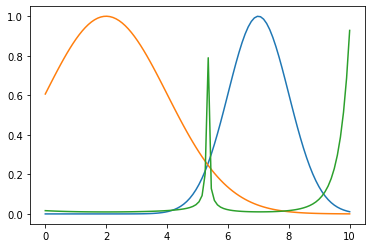

In [9]:
# Simple test with 1D gaussian function
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

t = np.linspace(0, 10, 100)
f1 = gaussian(t, 7, 1)
f2 = gaussian(t, 2, 2)

# plot 2 gaussian and their difference
plt.plot(t, f1)
plt.plot(t, f2)
plt.plot(t, 0.01/abs(f2-f1))

plt.show()
# Note: difference works well, but scaling necessary for visualization, and careful with edge of function

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

*Add your implementation and discussion*

In [10]:
from scipy.spatial.distance import mahalanobis
from tqdm.notebook import tqdm
var_mean = (G_a["var"]+G_b["var"])/2
def my_mahalanobis(x1, x2, VI):
    x1 = np.asmatrix(x1).T
    x2 = np.asmatrix(x2).T
    return np.sqrt(np.amax((x1-x2).T@VI@(x1-x2)))
for v in (Gs): #Gs is a list of dictionaries. Each dictionary contains datas of a class (a, b or c)
    v["mahalanobis"] = np.asarray([[my_mahalanobis([x,y], v["mu"], LA.inv(var_mean)) for y in (YY[:,0])] for x in (XX[0,:])])

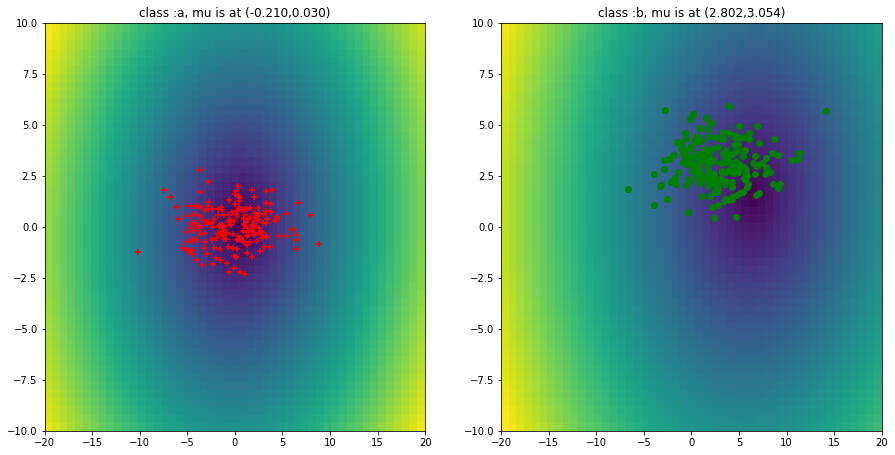

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (15, 7.5))
for ax, G in zip(axes, Gs[0:2]):
    ax.pcolor(XX,YY, G["mahalanobis"])
    ax.scatter(G["datapoint"][:,0], G["datapoint"][:,1], marker = G["marker"], color = G["color"])
    ax.set_title("class :{}, mu is at ({:.3f},{:.3f})".format(G["name"][-1],*G["mu"]))
plt.show()

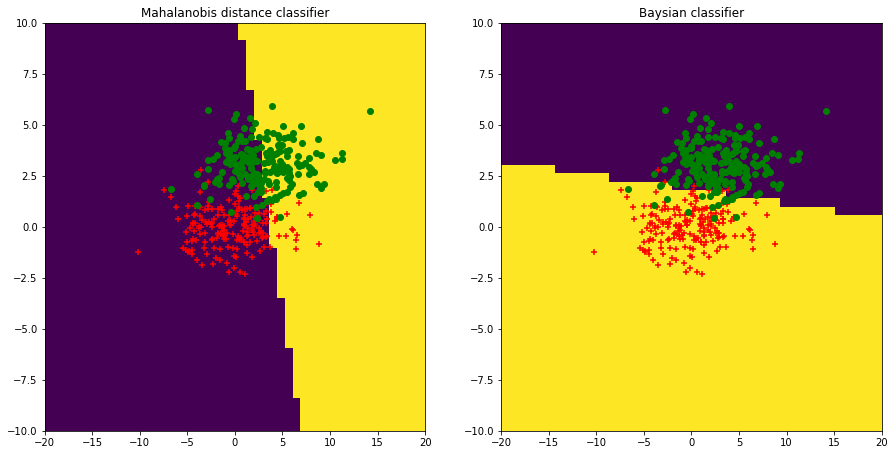

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (15, 7.5))
G_a_b_mahalanobis = G_a["mahalanobis"]-G_b["mahalanobis"]>0
G_a_b_bayse = G_a["value_complete"]-G_b["value_complete"]>0
for ax, v, t in zip(axes, [G_a_b_mahalanobis, G_a_b_bayse], ["Mahalanobis distance classifier", "Baysian classifier"]):
    ax.pcolor(XX,YY, v)
    ax.scatter(G_a["datapoint"][:,0], G_a["datapoint"][:,1], marker = G_a["marker"], color = G_a["color"])
    ax.set_title(t)
    ax.scatter(G_b["datapoint"][:,0], G_b["datapoint"][:,1], marker = G_b["marker"], color = G_b["color"])
plt.show()

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [13]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [14]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

FileNotFoundError: [Errno 2] No such file or directory: '../data/lab-03-data/part2/train-images-idx3-ubyte.gz'

In [ ]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP
*Add your implementation and discussion*